In [86]:
##Importing neccesssary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
%matplotlib inline

In [87]:
##Reading Dataset

df = pd.read_csv('Bengaluru_House_Data.csv')

In [88]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [89]:
df.shape

(13320, 9)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


In [91]:
##Dropping features like 'area_type', 'availability', 'society'

df1 = df.drop(['area_type', 'availability', 'society'], axis=1)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [92]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [93]:
#Removing null values

df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [204]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12710 non-null  object 
 1   total_sqft  12710 non-null  object 
 2   bath        12710 non-null  float64
 3   balcony     12710 non-null  float64
 4   price       12710 non-null  float64
 5   bhk         12710 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 595.8+ KB


In [94]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [95]:
#Creating new column 'bhk' by extracting integer value of 'size' feature and dropping the 'size' feature

df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

c:\users\dinesh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
df2.drop('size', axis=1, inplace=True)

c:\users\dinesh\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [97]:
df2.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [98]:
df2['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [99]:
#Extracting values with more than 20 bhk size house

df2[df2.bhk>20]

,location,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [100]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [101]:
#df['total_sqft']

In [102]:
#Defining a function to check the value is float or not

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [103]:
#Extracting values of 'total_sqft' feature as range

df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,1160 - 1195,2.0,0.0,59.935,2


In [104]:
print(df2[~df2['total_sqft'].apply(is_float)].count())

location      186
total_sqft    186
bath          186
balcony       186
price         186
bhk           186
dtype: int64


In [220]:
#Defining function tp convert range values into number by calculating average

def convert_range_to_num(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0]) + float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [221]:
#Example
convert_range_to_num('2166')

2166.0

In [222]:
#Example

convert_range_to_num('1195 - 1440')

1317.5

In [223]:
#Example
convert_range_to_num('34.46Sq. Meter')

In [224]:
df3 = df2.copy()

In [225]:
#Applying function 'convert_range_to_num' into 'total_sqft' feature

df3['total_sqft'] = df3['total_sqft'].apply(lambda x:convert_range_to_num(x))

In [226]:
df3.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [227]:
df3['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [228]:
#Extracting non-float values on 'total-sqft' feature

df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bhk


In [230]:
df3.dropna(inplace=True)

In [231]:
#Adding a feature 'price_per_sqft' in Rs. as original prices is given in Lakhs

df3['price_per_sqft'] = df3['price']*100000 / df3['total_sqft']
df3.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [232]:
len(df3['location'].unique())

1259

In [233]:
df3.shape

(12668, 7)

In [234]:
#Finding number of Houses by location wise

location_stats = df3['location'].value_counts()

In [235]:
location_stats

Whitefield                    513
Sarjapur  Road                372
Electronic City               300
Kanakpura Road                259
Thanisandra                   230
                             ... 
HOSUR RMAIN ROAD                1
Yemlur, Old Airport Road,       1
Sundara Nagar                   1
Mallappa Layout                 1
Madanayakahalli                 1
Name: location, Length: 1259, dtype: int64

In [236]:
#Extracting no. of locations with less than 10 no. of houses
location_stats[location_stats <= 10].count()

1024

In [237]:
location_less_than_10 = location_stats[location_stats <= 10]

In [238]:
location_less_than_10.head()

1st Block Koramangala    10
Dairy Circle             10
Basapura                 10
Kodigehalli              10
Thyagaraja Nagar         10
Name: location, dtype: int64

In [239]:
#Marking as 'other' where no. of houses is less than 10 in any location

df3.location = df3.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

In [240]:
df3.location.nunique()

236

In [241]:
df3.reset_index(inplace=True)

In [242]:
df3.head(10)

,index,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
7,10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.888889
8,11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605
9,12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2,3800.000000


In [243]:
#Extracting no. of houses which has less than 300 sqft as size

len(df3[df3['total_sqft'] / df3['bhk'] <300])

655

In [244]:
#Creating new Dataset excluding less than 300 sqft size houses

df4 = df3[~(df3['total_sqft'] / df3['bhk'] <300)]

In [245]:
df4.shape

(12013, 8)

In [288]:
df4.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [287]:
len(df4.location.unique())

236

In [290]:
#Removing outliers on price_per_sqft per location

def remove_outliers_price_per_sqft(df):
    df_out= pd.DataFrame()
    for key, sub_df in df.groupby('location'):
        mean = np.mean(sub_df['price_per_sqft'])
        std = np.std(sub_df['price_per_sqft'])
        
        reduced_df = sub_df[(sub_df['price_per_sqft'] > (mean-std)) & (sub_df['price_per_sqft'] <= (mean+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df5= remove_outliers_price_per_sqft(df4)

In [291]:
df5.shape

(9853, 8)

In [354]:
df5.price_per_sqft.describe()

count     9853.000000
mean      5587.531444
std       2170.486260
min       1250.000000
25%       4225.352113
50%       5142.857143
75%       6355.932203
max      24000.000000
Name: price_per_sqft, dtype: float64

Text(0, 0.5, 'Count')

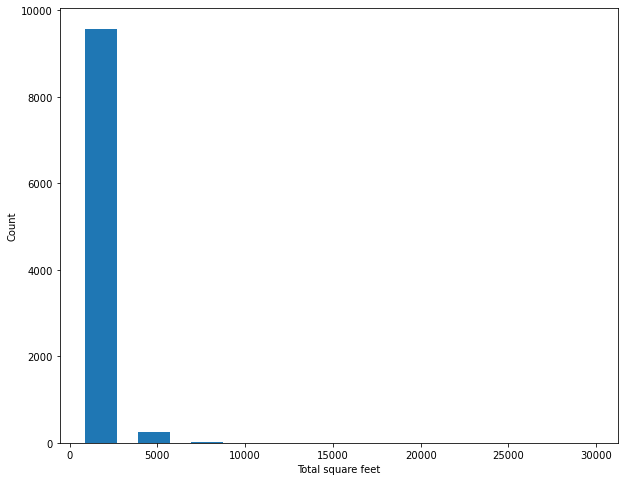

In [327]:
plt.figure(figsize= (10,8))
plt.hist(df5.total_sqft, rwidth=0.6, bins=10)
plt.xlabel('Total square feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

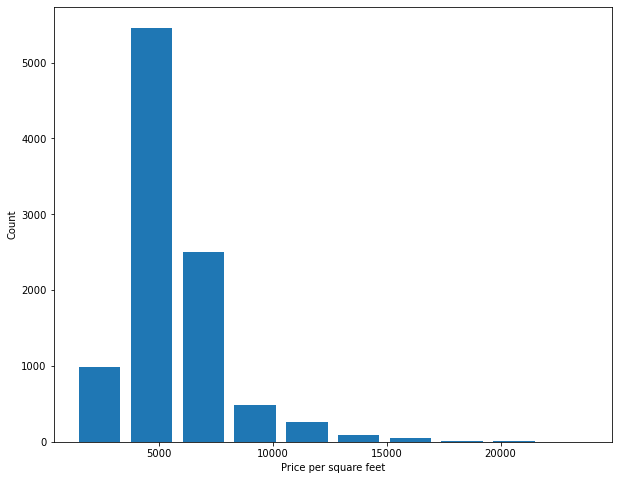

In [328]:
plt.figure(figsize= (10,8))
plt.hist(df5.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')

In [295]:
df5.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 13.])

In [297]:
#Extracting houses which has more than 8 bathrooms

len(df5[df5.bath > 8])

6

Text(0, 0.5, 'Count')

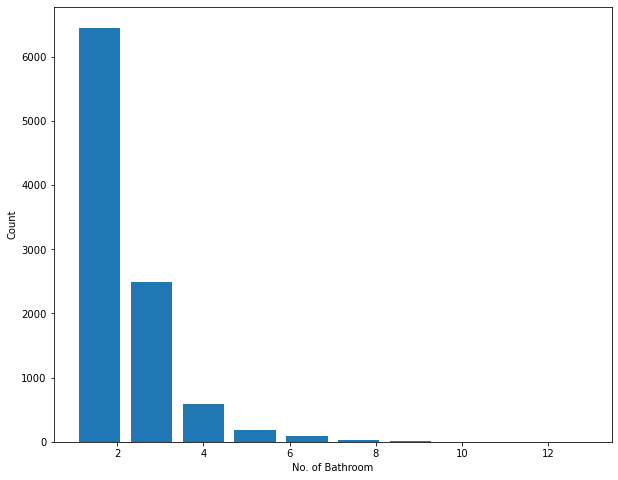

In [298]:
plt.figure(figsize= (10,8))
plt.hist(df5.bath, rwidth=0.8)
plt.xlabel('No. of Bathroom')
plt.ylabel('Count')

In [299]:
#Extracting rows which has more bathrooms than bhk
df5[df5.bath > df5.bhk+2]

,index,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1552,7709,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
6432,12103,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8074,2620,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [336]:
#Removing rows which has more no. of bathrooms than bhk
df6 = df5[df5.bath < df5.bhk+2]
df6.shape

(9772, 8)

Text(0, 0.5, 'Count')

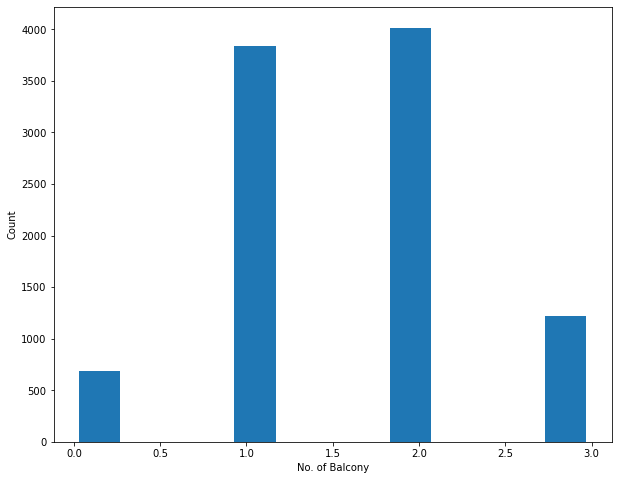

In [337]:
plt.figure(figsize= (10,8))
plt.hist(df6.balcony, rwidth=0.8)
plt.xlabel('No. of Balcony')
plt.ylabel('Count')

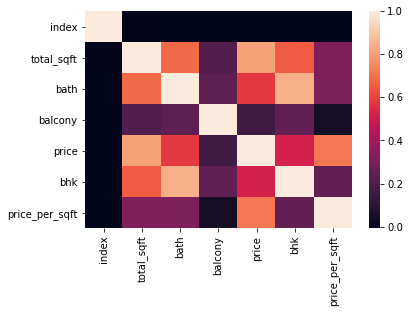

In [338]:
sns.heatmap(df5.corr())

In [334]:
df5.corr()

,index,total_sqft,bath,balcony,price,bhk,price_per_sqft
index,1.000000,-0.002456,-0.007955,-0.007850,-0.007680,-0.005846,-0.005582
total_sqft,-0.002456,1.000000,0.682534,0.211209,0.813709,0.656394,0.315672
bath,-0.007955,0.682534,1.000000,0.239886,0.584034,0.845382,0.314174
balcony,-0.007850,0.211209,0.239886,1.000000,0.161573,0.245497,0.048718
price,-0.007680,0.813709,0.584034,0.161573,1.000000,0.522457,0.713242
bhk,-0.005846,0.656394,0.845382,0.245497,0.522457,1.000000,0.250965
price_per_sqft,-0.005582,0.315672,0.314174,0.048718,0.713242,0.250965,1.000000


In [339]:
#Dropping the 'index' and balcony' features as it has less corelation with Output feature
df6.drop(['index', 'balcony', 'price_per_sqft'], axis=1, inplace=True)
df6.shape

(9772, 5)

In [340]:
df6.head()

,location,total_sqft,bath,price,bhk
0,Devarachikkanahalli,1250.0,2.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3


In [341]:
df6['bath'] = df6['bath'].astype('int64')

c:\users\dinesh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [342]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 9852
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    9772 non-null   object 
 1   total_sqft  9772 non-null   float64
 2   bath        9772 non-null   int64  
 3   price       9772 non-null   float64
 4   bhk         9772 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 419.9+ KB


In [356]:
#Converting Categorical variables to Numerical variables using get_dummies

dummies = pd.get_dummies(df6.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [345]:
#Concatening the dummy dataset and df5 and dropping column 'other' to avoid dummy trap

df7 = pd.concat([df6.drop('location', axis=1), dummies.drop('other', axis=1)], axis= 1)

In [346]:
df7.shape

(9772, 239)

In [347]:
#Extracting Input variable(X) and Output variable(y)

X= df7.drop('price', axis=1)
y= df7.price

In [355]:
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [351]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [363]:
#Importing LinearRegression model and evaluating the score

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8128879866280694

In [366]:
#Evaluating the score using K-Fold Cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.25)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.75987727, 0.80910197, 0.83919272, 0.80087866, 0.75723118])

In [367]:
x = np.zeros(len(X.columns))
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [374]:
loc_index = np.where(X.columns == 'Vijayanagar')[0][0]
loc_index

228

In [384]:
X.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=238)

In [397]:
#Defining a function to predict the price of house based on features: loaction, sqft, bath, bhk

def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    #print(loc_index) #Location index
    #print(x[loc_index]) #Location index value
    
    if loc_index >= 0:
        x[loc_index] = 1
            
    return 'Estimated price: ' + str(lr.predict([x])[0]) + ' Lakhs'

In [398]:
predict_price('5th Phase JP Nagar', 1000, 3, 2)

'Estimated price: 56.76329758262443 Lakhs'

In [399]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

'Estimated price: 90.87740296192347 Lakhs'

In [400]:
predict_price('1st Phase JP Nagar', 1200, 2, 3)

'Estimated price: 99.25350984534641 Lakhs'

In [325]:
import pickle
with open('Bengaluru_House_Price.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [326]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))